In [2]:
import pandas as pd
# 1.加载数据
dataset = pd.read_csv('./pollution.csv', index_col=0)
dataset

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [16]:
values = dataset.values
values

array([[129.0, -16, -4.0, ..., 1.79, 0, 0],
       [148.0, -15, -4.0, ..., 2.68, 0, 0],
       [159.0, -11, -5.0, ..., 3.57, 0, 0],
       ...,
       [10.0, -22, -3.0, ..., 242.7, 0, 0],
       [8.0, -22, -4.0, ..., 246.72, 0, 0],
       [12.0, -21, -3.0, ..., 249.85, 0, 0]], dtype=object)

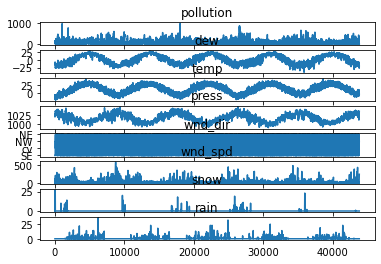

In [17]:
import matplotlib.pyplot as plt
i = 1
#8个特征
for group in range(8):
    plt.subplot(8,1,i)
    # 原始特征values中的group列进行可视化
    plt.plot(values[:, group])
    plt.title(dataset.columns[group])
    i += 1
plt.show()

In [11]:
dataset['wnd_dir'].value_counts()

SE    15290
NW    14130
cv     9384
NE     4996
Name: wnd_dir, dtype: int64

In [18]:
# 2.将分类特征wnd_dir进行标签编码
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
values[:, 4] = encoder.fit_transform(values[:, 4])
#设置数据类型为float32
values = values.astype('float32')
values

array([[129.  , -16.  ,  -4.  , ...,   1.79,   0.  ,   0.  ],
       [148.  , -15.  ,  -4.  , ...,   2.68,   0.  ,   0.  ],
       [159.  , -11.  ,  -5.  , ...,   3.57,   0.  ,   0.  ],
       ...,
       [ 10.  , -22.  ,  -3.  , ..., 242.7 ,   0.  ,   0.  ],
       [  8.  , -22.  ,  -4.  , ..., 246.72,   0.  ,   0.  ],
       [ 12.  , -21.  ,  -3.  , ..., 249.85,   0.  ,   0.  ]],
      dtype=float32)

In [20]:
# 3.统一数据维度（数据规划），可采用正态分布或01规范化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
scaled.shape

(43800, 8)

In [ ]:
#监督学习：带有label标签，人做了标记，学习结果向人为标记靠齐。常用于分类、回归任务

In [24]:
"""
 将时间序列数据转换为适用于监督学习的数据
 
 data: 观察序列
 n_in: 观察数据input(x)的步长（时间长度）， 范围 [1, len(data)], 默认为1
 n_out: output(y)的步长,默认为1
 dropnan: 是否删除NaN行
 
 return: 适用于监督学习的DataFrame
"""
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    #预测序列
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    #去掉NaN行
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [25]:
# 4.数据转换，前一时刻的8各特征预测下一时刻8各特征
reframed = series_to_supervised(scaled, 1, 1)
reframed.to_csv('reframed-1.csv')
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658,0.485294,0.213115,0.563637,0.666667,0.011433,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,0.010060,0.264706,0.278689,0.763638,0.333333,0.385730,0.000000,0.0,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0
43796,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0
43797,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0,0.010060,0.264706,0.262295,0.781818,0.333333,0.413996,0.000000,0.0
43798,0.010060,0.264706,0.262295,0.781818,0.333333,0.413996,0.000000,0.0,0.008048,0.264706,0.245902,0.781818,0.333333,0.420866,0.000000,0.0


In [26]:
# 5.去掉不需要预测的列，即var2(t)-var8(t).基于var1(t-1)-var8(t-1)前一时刻8个特征预测现在时刻的一个结果var1(t)
reframed.drop(reframed.columns[[9, 10, 11, 12, 13, 14, 15]], axis=1, inplace=True)
reframed.to_csv('reframed-2.cvs')
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658
...,...,...,...,...,...,...,...,...,...
43795,0.010060,0.264706,0.278689,0.763638,0.333333,0.385730,0.000000,0.0,0.008048
43796,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0,0.010060
43797,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0,0.010060
43798,0.010060,0.264706,0.262295,0.781818,0.333333,0.413996,0.000000,0.0,0.008048


In [27]:
#数据集切分，80%训练集，20%测试集
values = reframed.values
#LSTM 不能采用train_test_split()随机切分数据，因为时间序列会变的不连续
#XGBosst 可以使用train_test_split()切分，因为样本是相互独立的
n_train_hours = int(len(values) * 0.8)
#训练集
#:n_train_hours代表前:n_train_hours行， 后面的:代表所有列
train = values[:n_train_hours, :]
#测试集
test = values[n_train_hours:, :]

# :-1 表示从0到数组最后一位， -1代表数组最后一位
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

#有35039个样本，特征数有8个
train_X.shape


(35039, 8)

In [28]:
train_y.shape

(35039,)

In [29]:
# 转换为3D格式 [样本数， 时间步， 特征数]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [35]:
#序贯模型
from tensorflow.keras.models import Sequential
#全连接层和LSTM
from tensorflow.keras.layers import Dense, LSTM

#设置网络模型 为序贯模型
model = Sequential()
#50个神经元，train_X.shape[1]代表时间步， train_X.shape[2]代表特征数
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
#全连接到一个结果中
model.add(Dense(1))
#设置网络优化器
model.compile(optimizer='adam', loss='mse')
# 模型训练
result = model.fit(train_X, train_y, epochs=10, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False)



Epoch 1/10
548/548 - 1s - loss: 0.0039 - val_loss: 0.0103
Epoch 2/10
548/548 - 1s - loss: 9.7793e-04 - val_loss: 0.0041
Epoch 3/10
548/548 - 1s - loss: 8.2574e-04 - val_loss: 0.0022
Epoch 4/10
548/548 - 1s - loss: 8.0199e-04 - val_loss: 0.0017
Epoch 5/10
548/548 - 1s - loss: 7.9830e-04 - val_loss: 0.0015
Epoch 6/10
548/548 - 1s - loss: 7.9785e-04 - val_loss: 0.0014
Epoch 7/10
548/548 - 1s - loss: 7.9812e-04 - val_loss: 0.0013
Epoch 8/10
548/548 - 1s - loss: 7.9857e-04 - val_loss: 0.0012
Epoch 9/10
548/548 - 1s - loss: 7.9864e-04 - val_loss: 0.0012
Epoch 10/10
548/548 - 1s - loss: 7.9832e-04 - val_loss: 0.0011


In [34]:
#模型预测
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)
test_predict

array([[0.02950747],
       [0.03032703],
       [0.05565252],
       ...,
       [0.01380724],
       [0.01377581],
       [0.0121022 ]], dtype=float32)

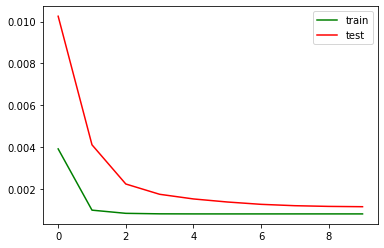

In [39]:
line1 = result.history['loss']
line2 = result.history['val_loss']
plt.plot(line1, label='train', c='g')
plt.plot(line2, label='test', c='r')
#图例
plt.legend(loc='best')
plt.show()

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50)                11800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 11,851
Trainable params: 11,851
Non-trainable params: 0
_________________________________________________________________


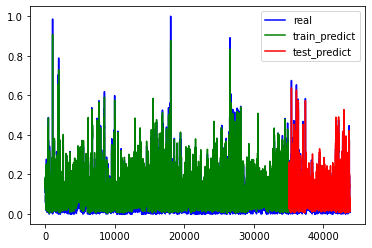

In [41]:
#呈现原始数据，训练结果，预测结果
def plot_img(source_data_set, train_predict, test_predict):
    #原始数据 蓝色
    plt.plot(source_data_set[:, -1], label='real', c='b')
    #训练数据 绿色
    plt.plot(train_predict[:, -1], label='train_predict', c='g')
    #预测结果 红色
    plt.plot([None for _ in train_predict] + [x for x in test_predict], label='test_predict', c='r')
    plt.legend(loc='best')
    plt.show
#绘制预测结果与实际结果对比
plot_img(values, train_predict, test_predict)